# # Fourier Donusumu

In [1]:
# coding: utf-8
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

### Once basit bir grafik hazirlayalim.
### Bir daire cizelim. 

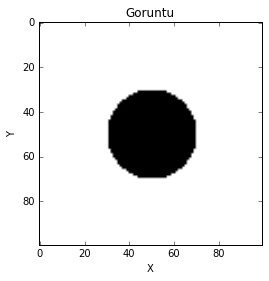

In [2]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
A=np.ones([100,100])
X,Y=np.meshgrid(np.r_[0:100], np.r_[0:100]);
ind=np.sqrt((X-50.)**2+(Y-50.)**2)<20
A[ind]=0;

setup_graph(x_label='X', y_label='Y', title='Goruntu')
plt.imshow(A);plt.gray();

### Simdi de frekans bolgesindeki karsiligina bakalim

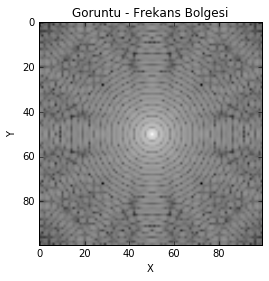

In [3]:
FA=np.fft.fftshift(np.fft.fft2(A));
setup_graph(x_label='X', y_label='Y', title='Goruntu - Frekans Bolgesi')
plt.imshow(10*np.log10(np.abs(FA)));plt.gray();